In [10]:
library(tidyverse)
options(repr.plot.width=5, repr.plot.height=4)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# STATS 306
## Homework 4: Exploratory data analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Whisker plots
Suppose you are given the following whisker plot for $n=500$ samples of a random variable $x$:
![whiser](https://i.imgur.com/HazzZQQ.png)

## Problem 1: Whisker plots 

This question is worth 1 point overall. 

**(a)** About how many samples were between 0.2 and 0.5?  

    Your Answer for 1a here
    There should be 25% of samples between 0.2 and 0.5, and there are two outliers, so 500 * 0.25 - 2 = 123.

**(b)** The bottom of the "box" is at 0.0. What is this value typically called? Explain how this is calculated. 

   Your Answer for 1b here
    First quartile, calculated so that 25% of samples are below this value and 75% are above.

**(c)** Explain what this plot tells us about our variable x. Why might you choose to make this plot? 

    Your Answer for 1c here
    A boxplot is a good plot to represent the range of the variable, along with the median and quartile values. It also shows outliers. The plot tells us that for variable x, the median value is about 0.1, and there are about 4 outliers. It also shows that the Q1 value is about 0.0 and the Q3 value is about 0.2, which indicates that the IQR is about 0.2. This plot might be chosen as it is a good representation of the range of a variable.

## Problem 2: Understanding air quality
This problem uses the air quality dataset that we studied in lecture:

In [2]:
load(url('https://datasets.stats306.org/pm25.RData'))

For each of the questions, produce an appropriate plot that visualizes the distribution or statistic, and explain why this type of plot is appropriate. (Note: multiple correct answers are possible.)

**(a)** The overall distribution of `pm25` across the entire dataset. (1/2 point)

I created a histogram as it is the best plot to see the distribution of a variable. The histogram below shows a log transformation, as it is much easier to look at the distribution after the transformation.

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 22 rows containing missing values (`geom_bar()`).”


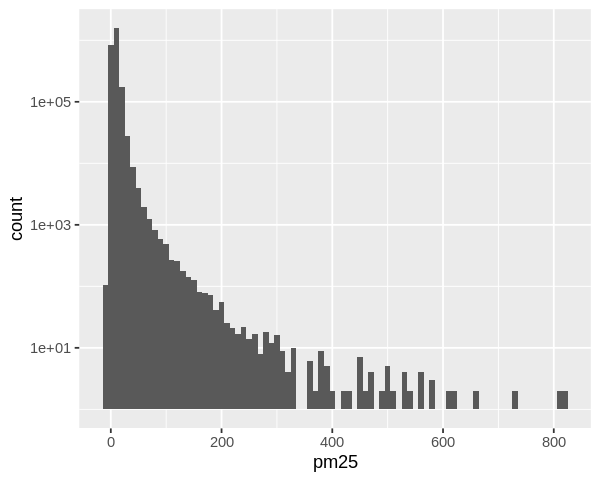

In [3]:
#ggplot(data = pm25, mapping = aes(x = log(pm25))) + geom_histogram(bins = 200)
pm25 %>% ggplot() + geom_histogram(aes(pm25), binwidth = 10) + scale_y_log10()

**(b)** The joint distribution of `pm25` and day of the week, considering only cases where `pm25` was less than 100. (1/2 point)  

I used a boxplot, as it was able to show the individual distributions of each day of the week vs the pm25. Also, here day of the week is a number instead of the names.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


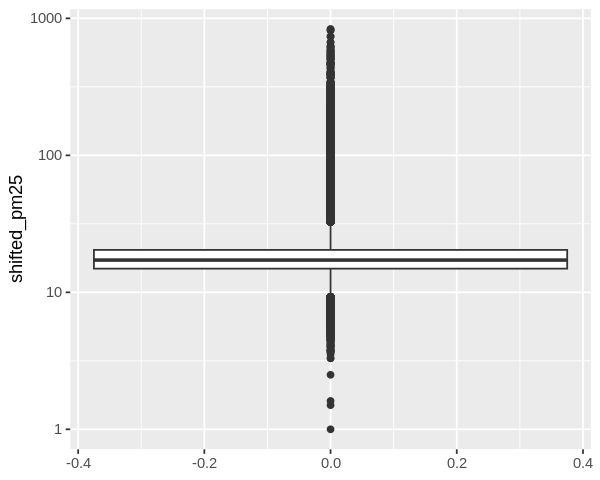

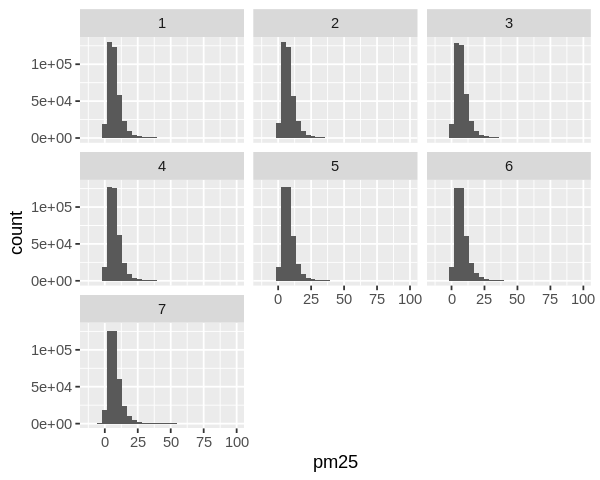

In [5]:
#pm25 = mutate(pm25, weekday = lubridate::wday(date))
#weekdays <- pm25 %>% group_by(weekday, pm25) %>% filter(pm25 < 100) %>% group_by(weekday)
#ggplot(data = weekdays, aes(x = reorder(weekday, pm25, median), y = pm25)) + geom_boxplot() + xlab("Day of the Week")
pm25 %>% mutate(shifted_pm25 = pm25 - min(pm25) + 1) %>%
  ggplot(aes(y=shifted_pm25)) + geom_boxplot() + scale_y_log10()
pm25 %>% filter(pm25 < 100) %>% mutate(day = lubridate::wday(date)) %>%
  ggplot() + geom_histogram(aes(x=pm25)) + facet_wrap(~day)

**(c)** The average `pm25` level for each month for Midwest states. We've provided a vector defining Midwestern states. Please use this in your answer! (1 point) 

I made a barplot which is the easiest way to look at averages of categorical variables. The barplot clearly shows the averages for Midwest states for each month. I also used facet_wrap() to easily split up the averages by month.

In [6]:
midwest_states <- c("Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin")

`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


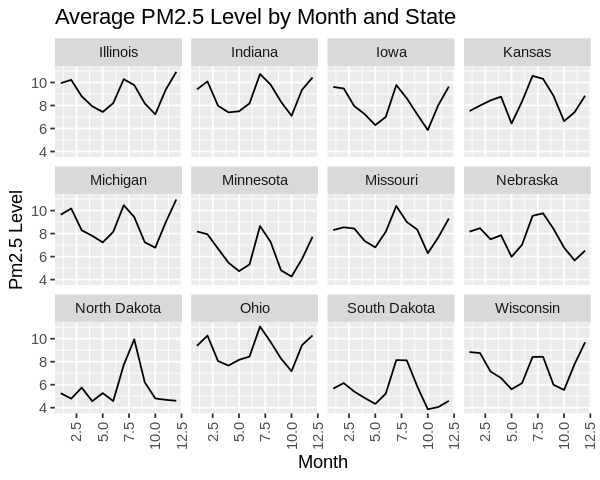

In [7]:
#pm25 = mutate(pm25, month = lubridate::month(date))
#averages <- pm25 %>% group_by(state, pm25) %>% filter(state %in% midwest_states) %>%
 # group_by(month, state) %>%
 # summarize(average = (mean(pm25)))
#ggplot(data = averages, aes(x = state, y = average)) + geom_bar(aes(color = month), stat = "identity")  +
 # facet_wrap(~month) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
pm25 %>% filter(state %in% midwest_states) %>%
  mutate(month = lubridate::month(date)) %>%
  group_by(state, month) %>%
  summarize(avg_pm25 = mean(pm25)) %>%
  ggplot() + geom_line(aes(x = month, y = avg_pm25), stat = 'identity') +
  facet_wrap(~state) + 
  labs(x = 'Month', y = "Pm2.5 Level", title = "Average PM2.5 Level by Month and State") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

**(d)** The US EPA considers PM2.5 levels greater than $35 \mu g/m^3$ to be dangerous. For each day, plot the proportion of counties in California with PM2.5 levels considered to be dangerous, out of all counties in California. What do you notice? Can you think of a reason to explain this pattern? (1 point)


I made a bar plot to show the proportion of counties in California with dangerous levels of PM2.5 as it is a very clear plot to show proportions. It seems that there are specific parts in each year that have higher levels of PM2.5 compared to other parts of the year. This can be due to weather as PM2.5 may be caused by air temperature.

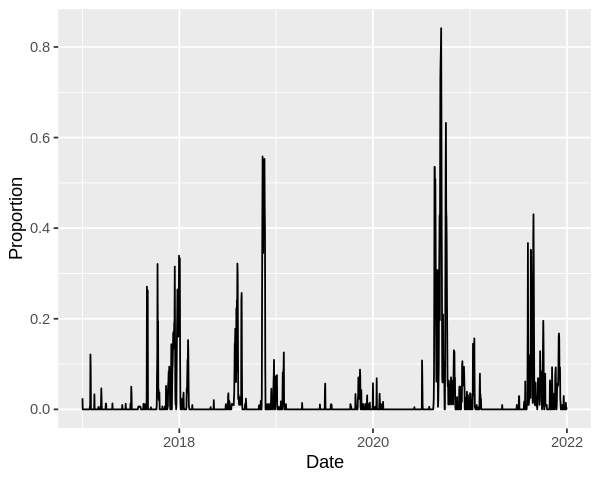

In [8]:
#danger <- pm25 %>% group_by(state, county, pm25) %>% filter(state == "California") %>%
 # mutate(dangerous = ifelse(pm25 > 35, 1, 0))
#proportions <- danger %>% group_by(date) %>% summarize(proportion = (sum(dangerous) / n()))
#ggplot(proportions, aes(x = date, y = proportion)) + geom_bar(stat = "identity")
pm25 %>% filter(state == "California") %>%
  group_by(date) %>% summarize(prop_dangerous = sum(pm25 > 35)/n()) %>%
  ggplot(aes(x = date, y = prop_dangerous)) + geom_line() +
  labs(x = "Date", y = "Proportion") 

**(e)** Define a state to be "large" if it has more than 15 counties, "medium" if it has more than 5 counties and no more than 15, and "small" if it has 5 or less counties. For each year, plot the average PM2.5 level (across all days in that year and all counties) for large, medium, and small states. (1 point)

I made a barplot which is the best way to look at averages of a categorical variable, but I also used facet_wrap() to split each size state into the different averages for each month.

`summarise()` has grouped output by 'state_type'. You can override using the
`.groups` argument.


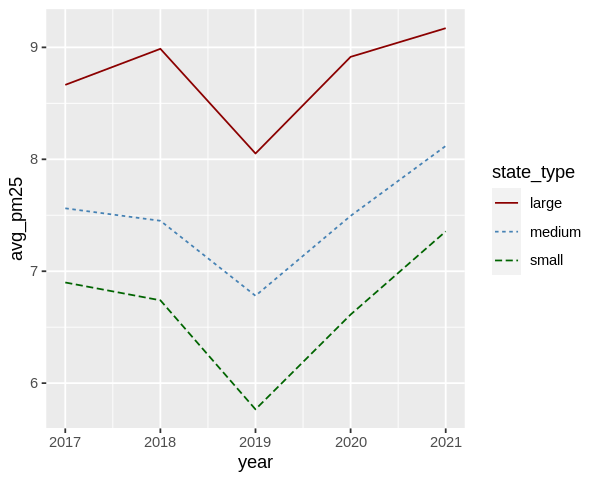

In [13]:
#sizes <- pm25 %>% group_by(state) %>% mutate(size = ifelse(length(unique(county)) > 15, "large", ifelse(length(unique(county)) > 5, 
#"medium", "small")))
#pm25 = mutate(pm25, year = lubridate::year(date))
#avg_bysize <- sizes %>% group_by(size, year) %>% summarize(average = mean(pm25))
#ggplot(data = avg_bysize, aes(x = size, y = average)) + geom_bar(aes(color = year), stat = "identity") +
#  facet_wrap(~year) + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
pm25 %>% mutate(year = lubridate::year(date)) %>%
  group_by(state) %>% mutate(num_counties = n_distinct(county),
state_type = case_when(num_counties > 15 ~ "large",
num_counties > 5 ~ "medium",
num_counties > 0 ~ "small")) %>%
  group_by(state_type, year) %>%
  summarize(avg_pm25 = mean(pm25)) %>%
  ungroup %>% ggplot(aes(year, avg_pm25)) + 
  geom_line(aes(color = state_type, linetype = state_type)) +
    scale_color_manual(values = c("darkred", "steelblue", "darkgreen"))

## Problem 3: College football
The next few questions use a new data set. The file `cfb.RData` contains a table called `cfb` with information on 5,116 college football games played from 2011 to 2017:

In [ ]:
load(url('https://datasets.stats306.org/cfb.RData'))
head(cfb)
glimpse(cfb)

(Each row of the table is one game, and contains various statistics for both the winning and losing teams.)

**(a)** College football is divided into various conferences. (UM is in the Big Ten conference.) **A conference game is a game where the `winning_conference` and `losing_conference` are the same**. For example, row 4631 of CFB is a conference game between Western Michigan and Buffalo, both in the Mid-American Conference. A total of 139 points were scored:

In [15]:
cfb %>% slice(4631) %>% 
    select(winning, winning_conference, winning_points, 
           losing, losing_conference, losing_points)

winning,winning_conference,winning_points,losing,losing_conference,losing_points
<chr>,<chr>,<int>,<chr>,<chr>,<int>
W. Michigan,MAC,71,Buffalo,MAC,68


Certain conferences have a reputation for being higher scoring. Investigate this by restricting to conference games and producing a box-and-whisker plot that shows the distribution of total number of points scored per game (ppg) by conference from **2011 to 2015**. Ensure that the conference names in the plot are legible, and sort the conferences in order of the median ppg. Which conference had the highest scores? The lowest? Do you think these differences are real, or arose due to chance? (1 point)

The Big 12 had the highest scores, whereas Independent had the lowest scores. I think these differences are real, and not due to chance because a conference like the Big 12 is one of the best conferences for college football and therefore it makes sense that they have the most total points.

`summarise()` has grouped output by 'year', 'winning_conference',
'winning_points', 'losing_conference', 'losing_points'. You can override using
the `.groups` argument.


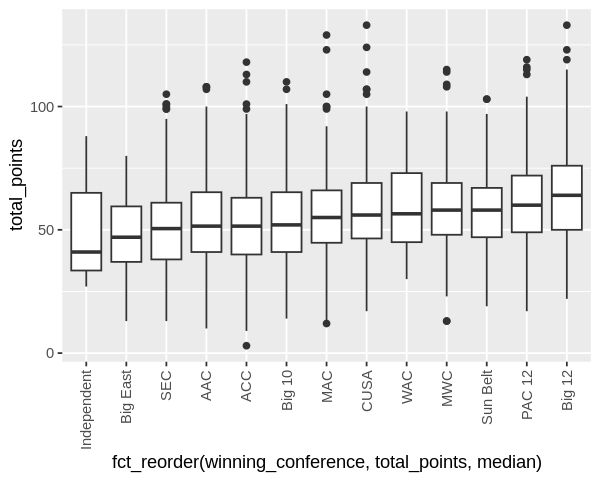

In [ ]:
conf_games <- cfb %>% group_by(year, winning_conference, winning_points, losing_conference, losing_points) %>%
  filter(winning_conference == losing_conference & year %in% c(2011:2015)) %>%
  summarize(total_points = winning_points + losing_points)
ggplot(conf_games, aes(x=fct_reorder(winning_conference, total_points, median), y=total_points)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

**(b)** In football, two main offensive tactics to gain yardage territory are rushing and passing. Using the techniques we learned in class for filtering and reshaping data, create a new table which contains only the data among Big 10 conference teams and shows the passing and rushing yardage for each year and week for each team. (1 point) 

If we sort such a table chronologically and in alphabetical order of team name, the first few rows are:

    # A tibble: 774 × 5
      year week  team           pass_yards rush_yards
      <int> <fct> <chr>              <int>      <int>
    1  2011 5     Michigan             217        363
    2  2011 5     Illinois             391         82
    3  2011 5     Penn State           271        193
    4  2011 5     Michigan State       250         71
    5  2011 5     Wisconsin            255        231

Note: It is fine to create two dataframes and combine them together at the end. 

In [17]:
cfb$week = as.numeric(cfb$week)
winning <- cfb %>% group_by(year, week, winning_conference, winning_pass_yards, winning_rush_yards, losing_conference) %>%
  filter(winning_conference == losing_conference & winning_conference == "Big 10") %>%
  group_by(year, week) %>% summarize(team = winning, pass_yards = (winning_pass_yards), 
rush_yards = (winning_rush_yards))

losing <- cfb %>% group_by(year, week, winning_conference, losing_conference, losing_pass_yards, losing_rush_yards) %>%
  filter(winning_conference == losing_conference & winning_conference == "Big 10") %>%
  group_by(year, week) %>% summarize(team = losing, pass_yards = losing_pass_yards, rush_yards = losing_rush_yards) 

yards <- rbind(winning, losing) %>% arrange(year, week, team)
yards

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'year', 'week'. You can override using the
`.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'year', 'week'. You can override using the
`.groups` argument.


year,week,team,pass_yards,rush_yards
<int>,<dbl>,<chr>,<int>,<int>
2011,5,Illinois,391,82
2011,5,Indiana,184,72
2011,5,Michigan,217,363
2011,5,Michigan State,250,71
2011,5,Minnesota,104,73
2011,5,Nebraska,176,159
2011,5,Northwestern,160,169
2011,5,Ohio State,143,35
2011,5,Penn State,271,193


**(c)** Some teams rely more on passing to gain yardage, while other rely more on rushing. Create an appropriate 
plot that visualizes the joint distribution of passing and rushing yardage for each team over. In your opinion, are there any outliers? What are they? Is there any reason for them to be outlying? (1 point) 

Note: you may need to use dplyr to extract the outliers from the table data. 

There doesn't appear to be any significant outliers. There is a point at around 500 pass_yards and about 250 rush_yards that seems somewhat like an outlier, but doesn't appear to be super significant. Outliers in this data set may occur as each team has their own way of playing the game which may cause them to have more or less rushing or passing yards.

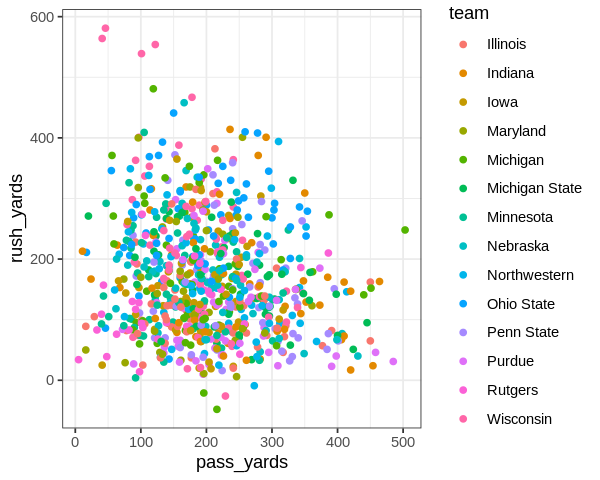

In [18]:
ggplot(yards) + geom_point(aes(x = pass_yards, y = rush_yards, color = team)) + 
  theme_bw() 

## Problem 4 (Challenge problem) 
The column `winning_h_a_n` shows whether the winning team was playing at **H**ome, **A**way, or on a **N**eutral field (not home to either team). Filter only to the records related to Michigan and produce a table which has five columns: `year`, `week`, `points`, `venue`, `outcome` where venue is `H/A/N` for `Home/Away/Neutral` and outcome is `winning` or `losing`. A subset of this table is provided below for reference: 

    # A tibble: 176 × 5
        year week  venue outcome points
       <int> <chr> <chr> <chr> <int>  
     1  2011  1      H   winning   34        
     2  2011  1      A   losing    10             
     3  2011  2      H   winning   35              
     4  2011  2      A   losing    31      
     5  2011  3      H   winning   31                          
     6  2011  3      A   losing    3             
     7  2011  4      H   winning   28             
     8  2011  4      A   losing    7            
     9  2011  5      H   winning   58       
     10 2011  5      A   losing    0           

Michigan Stadium, nicknamed "The Big House," is the football stadium for the University of Michigan with the capacity of 107,601 which can potentially house 100,000+ Wolverine fans.

Does Michigan win more *at the Big House* ? In other words, is the proportion of games won by Michigan statistically different from proportion of games won by the away team at the Big House ? Use the above table to perform a hypothesis test and draw conclusion.

(Hint: In STATS 250 you learned how to test this. This test is implemented in R using the binom.test function.)

The proportion of games won by Michigan is statistically different from the proportion of games won by the away team at the Big House. The p-value for this hypothesis test is super small and very close to 0, which supports that the proportion of games won by Michigan is statistically different from the proportion of games won by the away team.

In [20]:
table <- cfb %>% group_by(year, week, winning_h_a_n, losing_h_a_n, winning, losing, winning_points, losing_points) %>%
  filter(winning == "Michigan"|losing == "Michigan") %>% group_by(year, week) %>%
  summarize(venue = ifelse(winning == "Michigan", winning_h_a_n, losing_h_a_n), 
outcome = ifelse(winning == "Michigan", "winning", "losing"), 
points = ifelse(winning == "Michigan", winning_points, losing_points)) %>% print

summary <- table %>% group_by(venue, outcome) %>% filter(venue == "H") %>% group_by(outcome) %>%
  summarize(outcome_num = ifelse(outcome == "winning", 1, 1))

sum <- summary %>% summarize(prop = sum(outcome_num))
sum
binom.test(38, 47, alternative = "two.sided")

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


# A tibble: 88 × 5
# Groups:   year [7]
    year  week venue outcome points
   <int> <dbl> <chr> <chr>    <int>
 1  2011     1 H     winning     34
 2  2011     2 H     winning     35
 3  2011     3 H     winning     31
 4  2011     4 H     winning     28
 5  2011     5 H     winning     58
 6  2011     6 A     winning     42
 7  2011     7 A     losing      14
 8  2011     9 H     winning     36
 9  2011    10 A     losing      16
10  2011    11 A     winning     31
# ℹ 78 more rows


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'outcome'. You can override using the
`.groups` argument.


outcome,prop
<chr>,<dbl>
losing,9
winning,38



	Exact binomial test

data:  38 and 47
number of successes = 38, number of trials = 47, p-value = 2.49e-05
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6674027 0.9085084
sample estimates:
probability of success 
             0.8085106 
